In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# class LR(nn.Module):
#   def __init__(self,input_size,output_size):
#     super().__init__()
#     self.linear=nn.Linear(input_size,output_size)
#   def forward(self,x):
#     pred=self.linear(x)
#     return pred


In [3]:
# torch.manual_seed(1)
# model=LR(1,1)
# print(list(model.parameters()))

In [4]:
# x=torch.tensor([[1.0],[2.0]])
# print(model.forward(x))

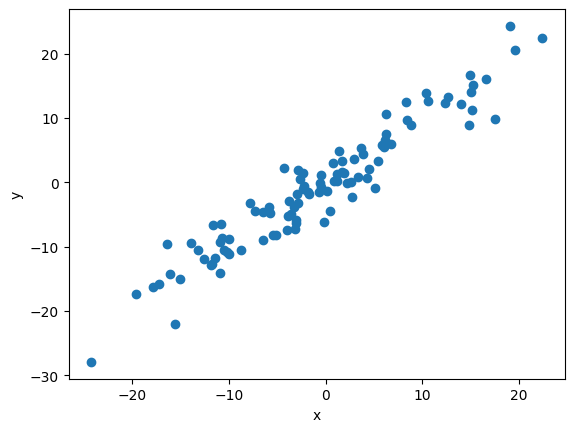

In [5]:
X=torch.randn(100,1)*10
y=X+torch.randn(100,1)*3
plt.plot(X.numpy(),y.numpy(),'o')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [6]:
class LR(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.linear=nn.Linear(input_size,output_size)
  def forward(self,x):
    pred=self.linear(x)
    return pred


In [7]:
torch.manual_seed(1)
model=LR(1,1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [8]:


def get_params():
  [w,b]=model.parameters()
  w1=w[0][0].item()
  b1=b[0].item()
  return w1,b1

In [9]:
def plot_fit(title):
  plt.title=title
  w1,b1=get_params()
  x1=np.array([-30,30])
  y1=w1*x1+b1
  plt.plot(x1,y1,'r')
  plt.scatter(X,y)
  plt.show()

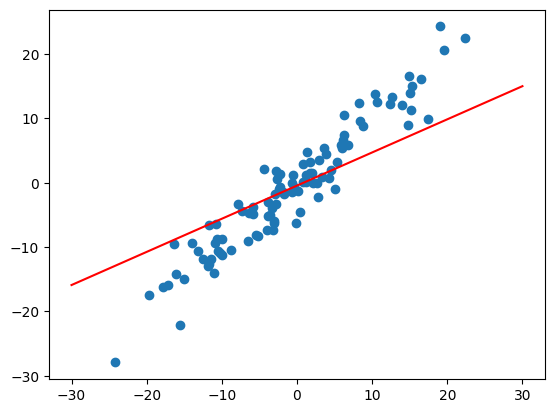

In [10]:
plot_fit('initial_model')

In [11]:
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)


In [12]:
epochs = 100
losses=[]
for i in range(epochs):
  y_pred=model.forward(X)
  loss=criterion(y_pred,y)
  print('epoch',i,'loss',loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch 0 loss 26.252134323120117
epoch 1 loss 20.061498641967773
epoch 2 loss 15.984112739562988
epoch 3 loss 13.298513412475586
epoch 4 loss 11.529552459716797
epoch 5 loss 10.364287376403809
epoch 6 loss 9.596620559692383
epoch 7 loss 9.090811729431152
epoch 8 loss 8.757463455200195
epoch 9 loss 8.537698745727539
epoch 10 loss 8.392743110656738
epoch 11 loss 8.297056198120117
epoch 12 loss 8.233819007873535
epoch 13 loss 8.191953659057617
epoch 14 loss 8.164164543151855
epoch 15 loss 8.145648002624512
epoch 16 loss 8.133238792419434
epoch 17 loss 8.124852180480957
epoch 18 loss 8.119115829467773
epoch 19 loss 8.11512565612793
epoch 20 loss 8.112286567687988
epoch 21 loss 8.110208511352539
epoch 22 loss 8.108628273010254
epoch 23 loss 8.107379913330078
epoch 24 loss 8.10634994506836
epoch 25 loss 8.105464935302734
epoch 26 loss 8.10467529296875
epoch 27 loss 8.103950500488281
epoch 28 loss 8.10326862335205
epoch 29 loss 8.102616310119629
epoch 30 loss 8.101984024047852
epoch 31 loss 8.

Text(0.5, 0, 'epoch')

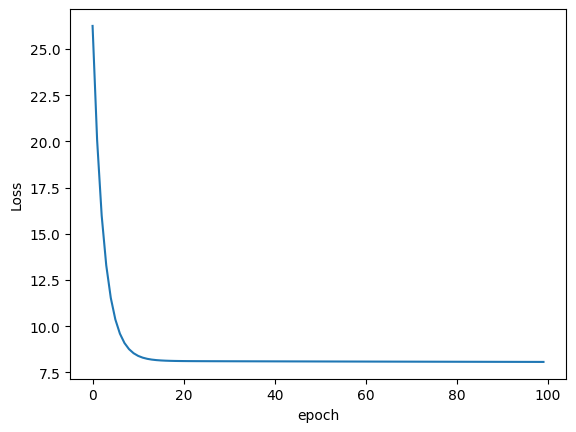

In [13]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

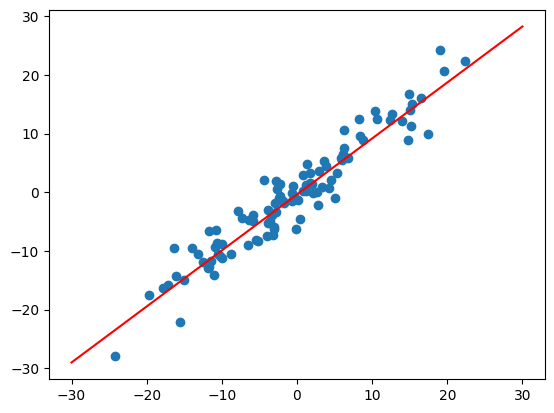

In [14]:
plot_fit('trained_model')
